# Assignment 3
### Due 9/23. Do four of five.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [2]:
health = pd.read_csv('data/nhanes_data_17_18.csv')
health.head()

/tmp/ipykernel_1359/818621640.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  health = pd.read_csv('data/nhanes_data_17_18.csv')


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
print(health['GeneralHealthCondition'].value_counts())
print(health['GeneralHealthCondition'].isna().value_counts())

print(health['TriedToLoseWeightInPastYear'].value_counts())
print(health['TriedToLoseWeightInPastYear'].isna().value_counts())

GeneralHealthCondition
Good         2454
Very good    1544
Fair or      1175
Excellent     619
Poor?         172
Name: count, dtype: int64
GeneralHealthCondition
False    5964
True     2402
Name: count, dtype: int64
TriedToLoseWeightInPastYear
0.0    3064
1.0    2023
Name: count, dtype: int64
TriedToLoseWeightInPastYear
False    5087
True     3279
Name: count, dtype: int64


In [7]:
pd.crosstab(health['TriedToLoseWeightInPastYear'], health['GeneralHealthCondition'], normalize='columns')

GeneralHealthCondition,Excellent,Fair or,Good,Poor?,Very good
TriedToLoseWeightInPastYear,,,,,
0.0,0.68071,0.564367,0.579349,0.606667,0.618321
1.0,0.31929,0.435633,0.420651,0.393333,0.381679


It appears that no matter what their health condition is, most people did not try to lose weight in the past year. Those with in the 'fair' condition were slightly more likely to have tried to lose weight. 

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [20]:
print(health['GeneralHealthCondition'].value_counts())
print(health['GeneralHealthCondition'].isna().value_counts())

print(health['CurrentSelfreportedWeightPounds'].describe())
print(health['CurrentSelfreportedWeightPounds'].isna().value_counts())

GeneralHealthCondition
Good         2454
Very good    1544
Fair or      1175
Excellent     619
Poor?         172
Name: count, dtype: int64
GeneralHealthCondition
False    5964
True     2402
Name: count, dtype: int64
count    5828.000000
mean      350.995710
std      1280.908078
min        72.000000
25%       145.000000
50%       171.500000
75%       208.000000
max      9999.000000
Name: CurrentSelfreportedWeightPounds, dtype: float64
CurrentSelfreportedWeightPounds
False    5828
True     2538
Name: count, dtype: int64


In [36]:
#data cleaning
cleaned_weight = health['CurrentSelfreportedWeightPounds'].replace([9999, 7777], np.nan)
health['cleaned_weight'] = cleaned_weight
health['cleaned_weight'].describe()

count    5724.000000
mean      178.805556
std        48.688953
min        72.000000
25%       145.000000
50%       170.000000
75%       205.000000
max       484.000000
Name: cleaned_weight, dtype: float64

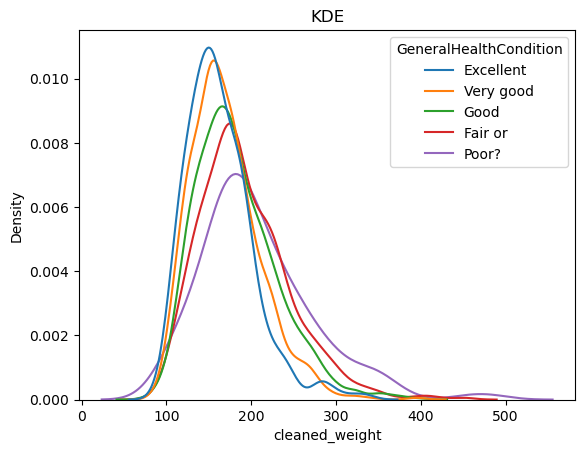

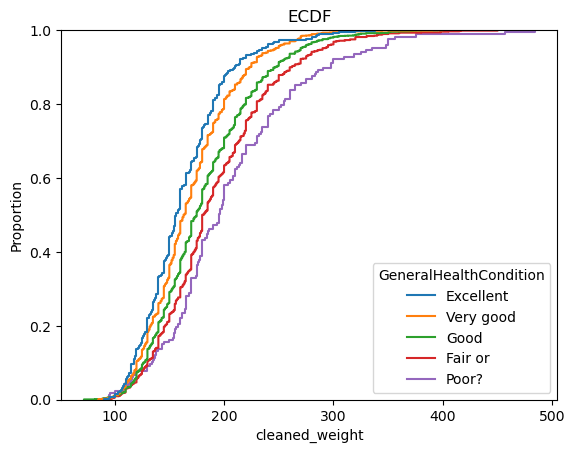

cleaned_weight                                       \
                                count        mean        std   min     25%   
GeneralHealthCondition                                                       
Excellent                       492.0  162.469512  39.620258  90.0  135.00   
Fair or                        1100.0  191.737273  53.341340  86.0  155.00   
Good                           2226.0  181.793351  48.183931  72.0  147.25   
Poor?                           167.0  205.904192  66.251823  95.0  165.00   
Very good                      1342.0  169.307750  41.309565  85.0  140.00   

                                             
                          50%    75%    max  
GeneralHealthCondition                       
Excellent               156.0  185.0  338.0  
Fair or                 180.5  220.0  450.0  
Good                    175.0  210.0  400.0  
Poor?                   195.0  240.0  484.0  
Very good               163.5  191.0  400.0

In [39]:
conditioner = 'GeneralHealthCondition'
order = ['Excellent', 'Very good', 'Good', 'Fair or', 'Poor?']
sns.kdeplot( data=health, x='cleaned_weight', hue=conditioner, common_norm=False, hue_order=order ).set(title='KDE')
plt.show()
sns.ecdfplot( data=health, x='cleaned_weight', hue=conditioner, hue_order=order ).set(title='ECDF')
plt.show()
health.loc[:,['cleaned_weight', conditioner]].groupby(conditioner).describe()

People in better health conditions tend to weigh less. Also, the better health condition categories have smaller standard deviations, meaning that people in better health conditions tend to weight more similarly to each other.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [123]:
# core of function taken from course notes
def lcls(x,y, h = None, plot=True):
    ''' Computes local constant least squares regression estimates with Gaussian kernel. '''

    n = len(x) # Number of observations
    grid = np.sort(x.unique()) # Extract and sort unique values for x

    # Compute Silverman plug-in exstimate as bandwidth, if none provided:
    if h is None:
        iqr = np.quantile(x,.75) - np.quantile(x,.25)
        h = 0.9 * min(np.std(x), iqr/1.34) * len(x) **(-0.2)
        print(f'Computed bandwidth is: {h}')

    # Compute kernel:
    I = -(x.to_numpy().reshape(-1,1)-grid.reshape(1,-1) )**2
    K = np.exp(I/(2*h**2) )/np.sqrt(2*np.pi*h**2 )

    # Compute LCLS estimator:
    numerator = y@K # Compute the numerator
    denominator = np.sum(K,axis=0) # Compute denominator
    y_hat = numerator/denominator # Compute estimator

    # Plot results:
    if plot:
        sns.scatterplot(y=y, x=x, alpha=.05)
        sns.lineplot(x=grid,y=y_hat, color='orange')
        plt.show()

    return y_hat, grid

In [132]:
print(health['CarbohydrateGm_DR1TOT'].describe())
print(health['CarbohydrateGm_DR1TOT'].isna().value_counts())

print(health['DietaryFiberGm_DR1TOT'].describe())
print(health['DietaryFiberGm_DR1TOT'].isna().value_counts())

count    7.285000e+03
mean     2.438987e+02
std      1.239271e+02
min      5.397605e-79
25%      1.611500e+02
50%      2.224400e+02
75%      3.027300e+02
max      1.476760e+03
Name: CarbohydrateGm_DR1TOT, dtype: float64
CarbohydrateGm_DR1TOT
False    7285
True     1081
Name: count, dtype: int64
count    7.285000e+03
mean     1.566943e+01
std      1.021420e+01
min      5.397605e-79
25%      8.700000e+00
50%      1.340000e+01
75%      1.990000e+01
max      1.078000e+02
Name: DietaryFiberGm_DR1TOT, dtype: float64
DietaryFiberGm_DR1TOT
False    7285
True     1081
Name: count, dtype: int64


In [133]:
#data cleaning
cleaned_carbs = health['CarbohydrateGm_DR1TOT'].dropna()
cleaned_fiber = health['DietaryFiberGm_DR1TOT'].dropna()


Computed bandwidth is: 16.056604415500374


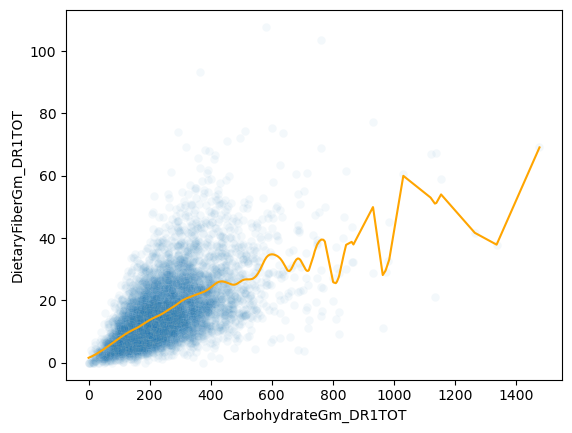

In [135]:
y_hat, grid = lcls(cleaned_carbs, cleaned_fiber)

The LCLS estimator shows that higher levels of carbohydrate consumption correlate to higher fiber levels.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

In [136]:
print(health['CholesterolMg_DR1TOT'].describe())
print(health['CholesterolMg_DR1TOT'].isna().value_counts())

print(health['TotalSugarsGm_DR1TOT'].describe())
print(health['TotalSugarsGm_DR1TOT'].isna().value_counts())

count    7.285000e+03
mean     2.775218e+02
std      2.343470e+02
min      5.397605e-79
25%      1.160000e+02
50%      2.080000e+02
75%      3.740000e+02
max      2.403000e+03
Name: CholesterolMg_DR1TOT, dtype: float64
CholesterolMg_DR1TOT
False    7285
True     1081
Name: count, dtype: int64
count    7.285000e+03
mean     1.065502e+02
std      7.318534e+01
min      5.397605e-79
25%      5.815000e+01
50%      9.197000e+01
75%      1.362100e+02
max      9.311600e+02
Name: TotalSugarsGm_DR1TOT, dtype: float64
TotalSugarsGm_DR1TOT
False    7285
True     1081
Name: count, dtype: int64


In [137]:
#data cleaning
cleaned_cholestorol = health['CholesterolMg_DR1TOT'].dropna()
cleaned_sugars = health['TotalSugarsGm_DR1TOT'].dropna()


Computed bandwidth is: 8.852793760940523


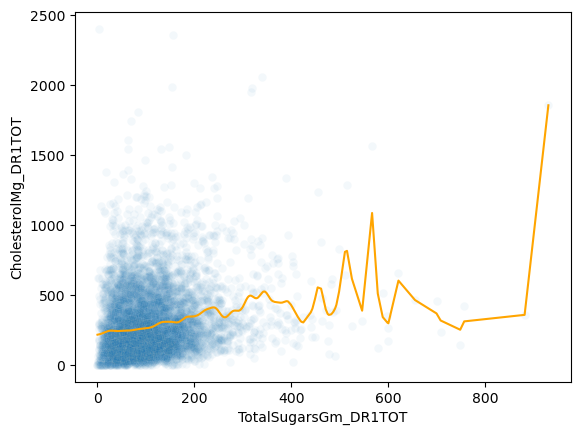

In [138]:
y_hat, grid = lcls(cleaned_sugars, cleaned_cholestorol)

While sugar does affect cholesterol, other variables can also explain the relationship (such as trans fat intake, smoking, and stress). Despite these other factors, this model can still be used to predict cholesterol since sugar has some effect on it.